In [182]:
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

In [139]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### Check if there are any null values

In [140]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


#### Convert the date column into pandas data time frame

In [142]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [151]:
timeSeriesDetailed = pd.read_csv('timeSeriesDay.csv',
                             index_col=[0],
                             names=['Prices'],
                             parse_dates=True)
timeSeriesDetailed.head()

,Prices
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


Text(0,0.5,'Price in Dollars')

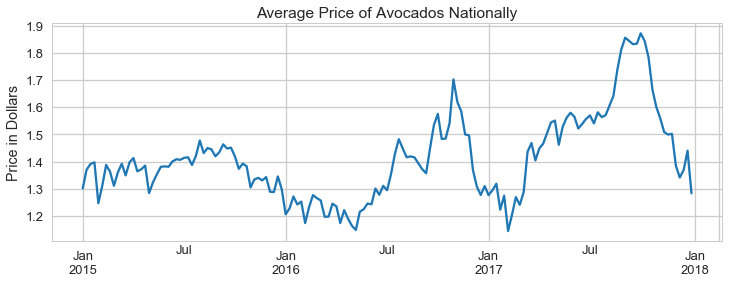

In [152]:
timeSeriesDetailed.Prices.plot(figsize=(12,4))
plt.title('Average Price of Avocados Nationally')
plt.ylabel('Price in Dollars')

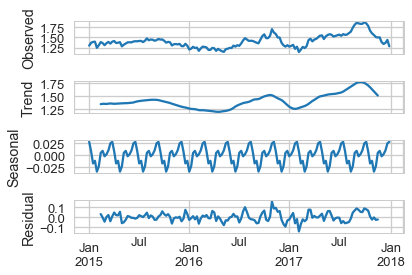

In [153]:
res = sm.tsa.seasonal_decompose(timeSeriesDetailed.Prices.interpolate(),
                                freq=decompfreq,
                                model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose1.png', dpi=200)

In [154]:
timeSeries = pd.read_csv('timeSeriesMonth.csv',
                             index_col=[0],
                             names=['Prices'],
                             parse_dates=True)
timeSeries.head()

,Prices
2015-01-01,1.365046
2015-02-01,1.326944
2015-03-01,1.361981
2015-04-01,1.383449
2015-05-01,1.344685


Text(0,0.5,'Price in Dollars')

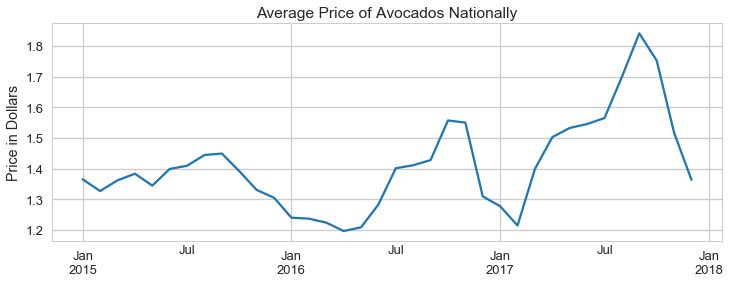

In [155]:
timeSeries.Prices.plot(figsize=(12,4))
plt.title('Average Price of Avocados Nationally')
plt.ylabel('Price in Dollars')

In [156]:
decompfreq = 12

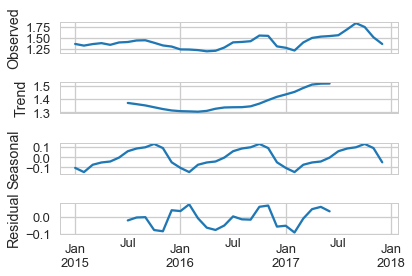

In [157]:
res = sm.tsa.seasonal_decompose(timeSeries.Prices.interpolate(),
                                freq=decompfreq,
                                model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose.png', dpi=150)

In [158]:
timeSeriesImports = pd.read_csv('MexicanFruitImports.csv',
                             index_col=[0],
                             names=['Imports'],
                             parse_dates=True)
timeSeriesImports.head()

,Imports
2015-01-01,424.663
2015-02-01,386.000
2015-03-01,451.898
2015-04-01,560.019
2015-05-01,610.835


Text(0,0.5,'Imports in Millions')

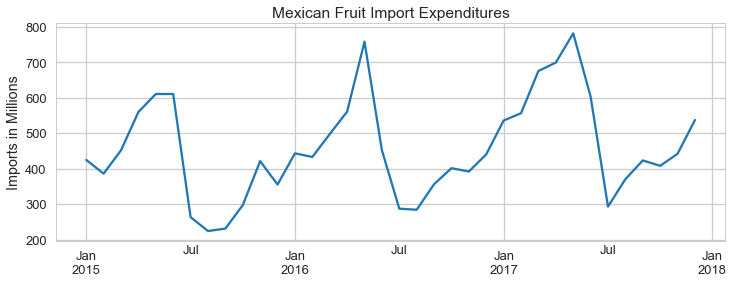

In [159]:
timeSeriesImports.Imports.plot(figsize=(12,4))
plt.title('Mexican Fruit Import Expenditures')
plt.ylabel('Imports in Millions')

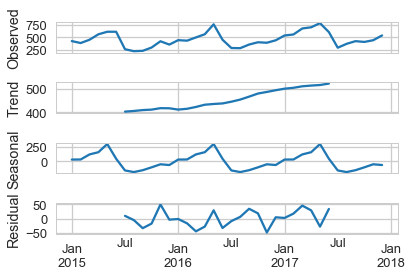

In [160]:
res = sm.tsa.seasonal_decompose(timeSeriesImports.Imports.interpolate(),
                                freq=decompfreq,
                                model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose3.png', dpi=200)

In [161]:
timeSeriesVolume = pd.read_csv('VolumeData.csv',
                             index_col=[0],
                             names=['California', 'Mexico', 'Chile', 'Dominican Republic', 'New Zealand', 'Peru'],
                             parse_dates=True)
timeSeriesVolume.head()

,California,Mexico,Chile,Dominican Republic,New Zealand,Peru
2015-01-04,164520,29719045,718677,740000,270000,0
2015-01-11,928302,50455653,811149,870000,0,0
2015-01-18,2169628,50940292,1025090,1090000,0,0
2015-01-25,4229894,38183291,481359,2260000,0,0
2015-02-01,3232783,29998307,853528,1350000,0,0


Text(0,0.5,'Imports in Pounds')

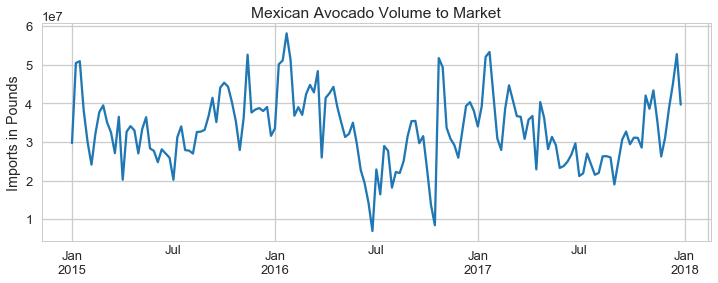

In [162]:
timeSeriesVolume.Mexico.plot(figsize=(12,4))
plt.title('Mexican Avocado Volume to Market')
plt.ylabel('Imports in Pounds')

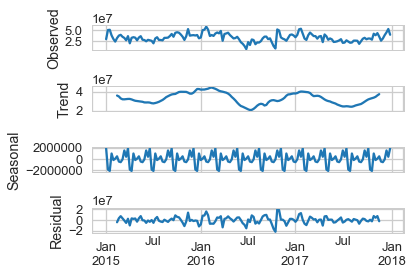

In [163]:
res = sm.tsa.seasonal_decompose(timeSeriesVolume.Mexico.interpolate(),
                                freq=decompfreq,
                                model='additive')
resplot = res.plot()
resplot.savefig('Seasonal_Decompose4.png', dpi=200)

In [164]:
timeSeriesVolumeDF = pd.DataFrame(timeSeriesVolume)

In [165]:
if isinstance(timeSeriesVolumeDF, pd.DataFrame):
        print ("This is a Dataframe");

This is a Dataframe


In [166]:
timeSeriesVolumeDF.head()

,California,Mexico,Chile,Dominican Republic,New Zealand,Peru
2015-01-04,164520,29719045,718677,740000,270000,0
2015-01-11,928302,50455653,811149,870000,0,0
2015-01-18,2169628,50940292,1025090,1090000,0,0
2015-01-25,4229894,38183291,481359,2260000,0,0
2015-02-01,3232783,29998307,853528,1350000,0,0


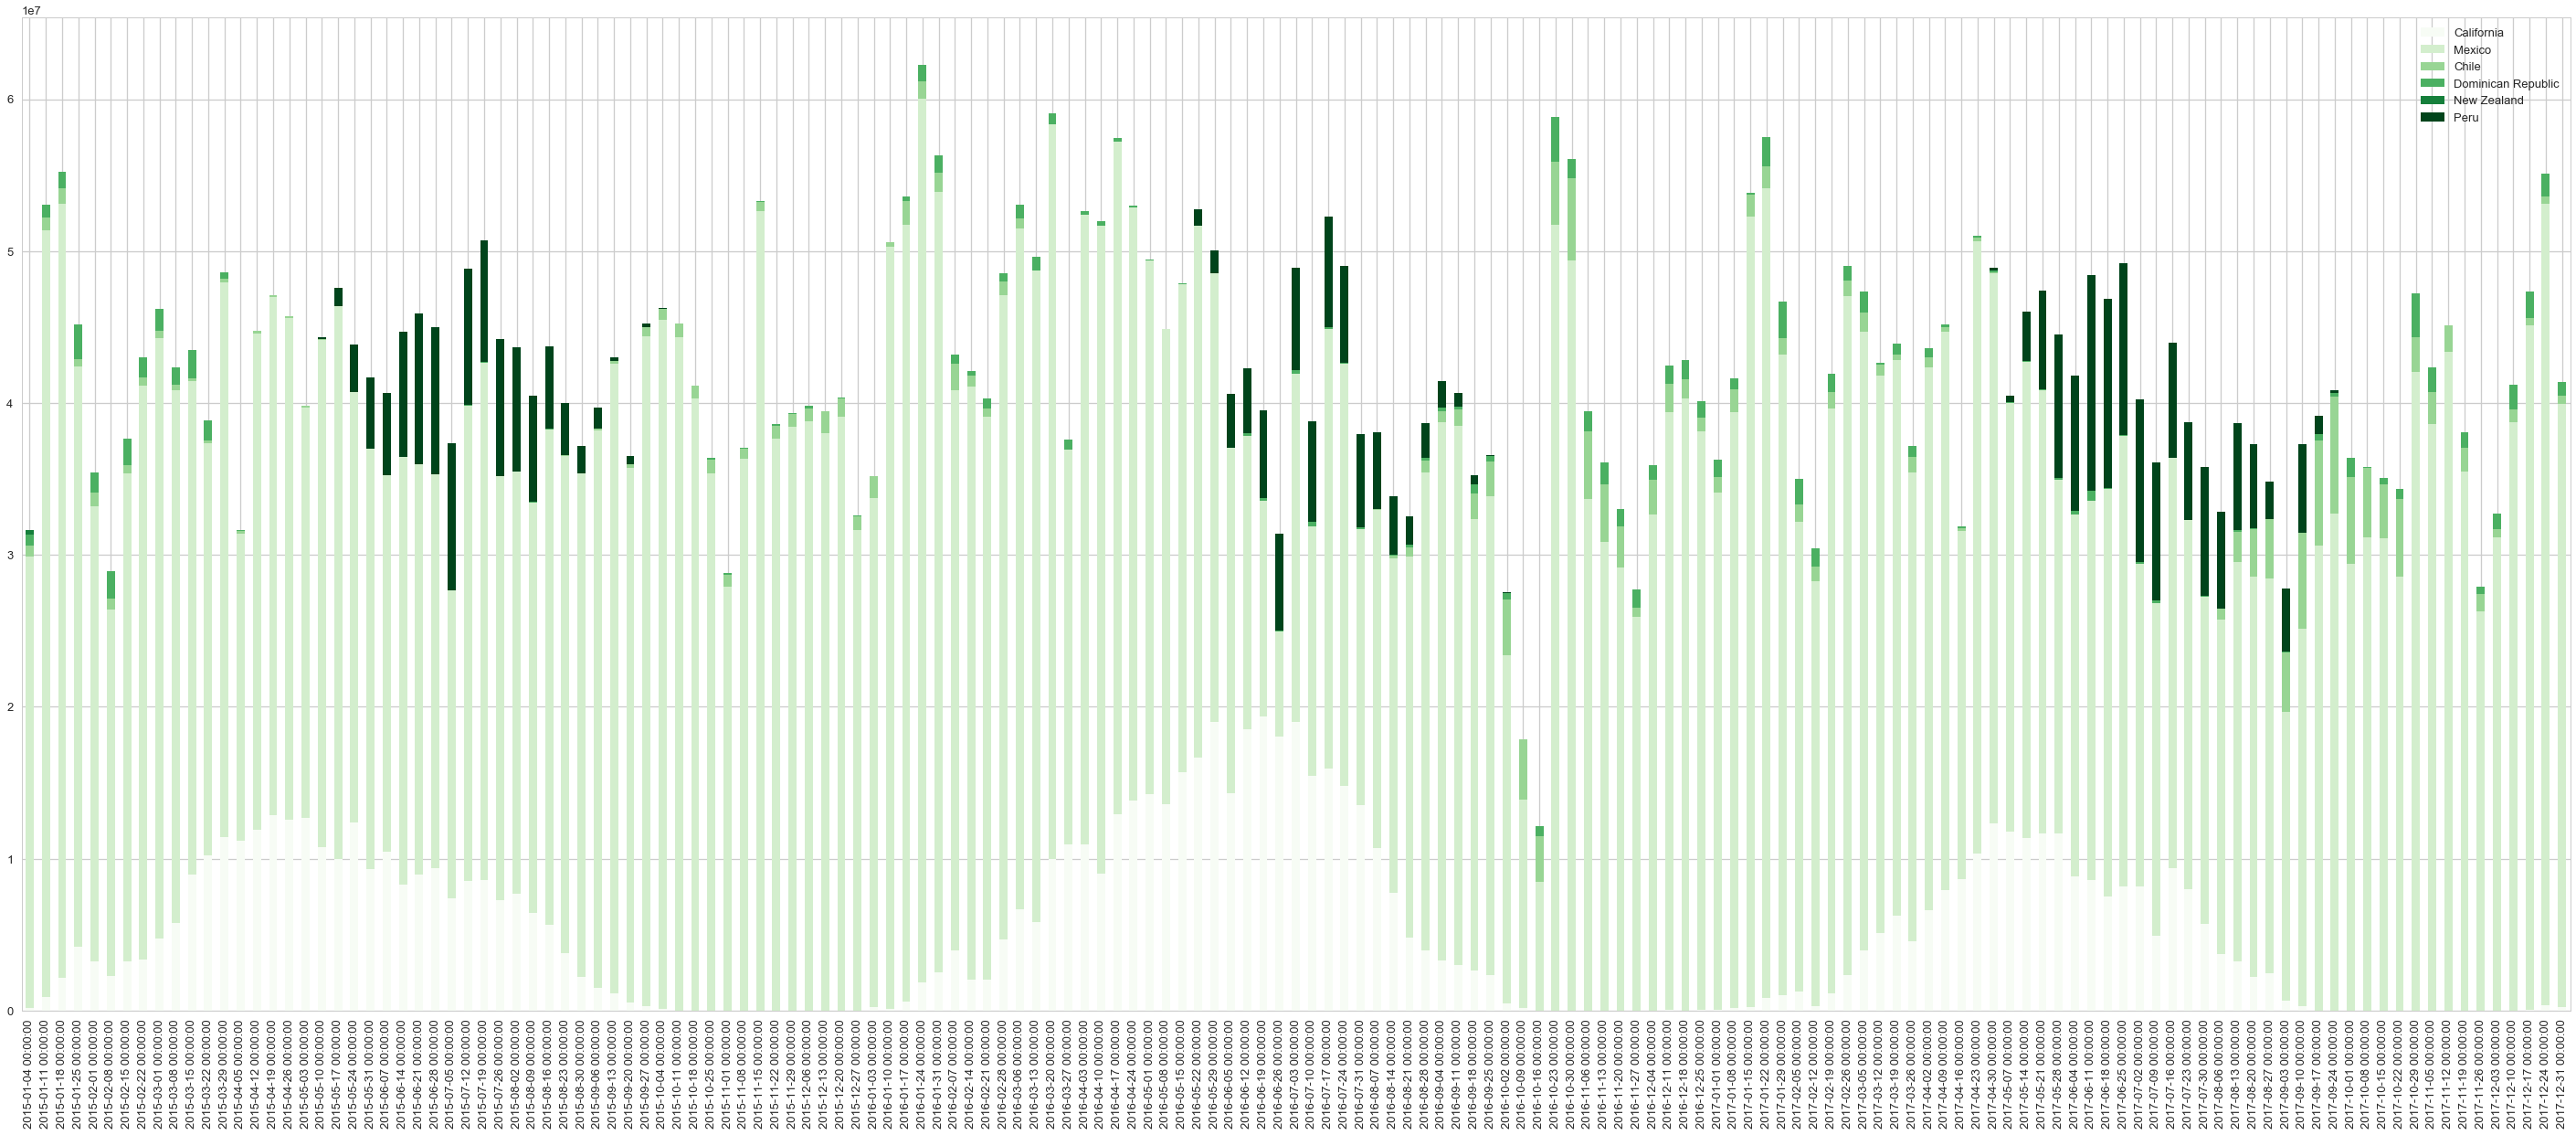

In [167]:
timeSeriesVolumeDF.plot.bar(stacked=True, figsize=(50,20), colormap="Greens")

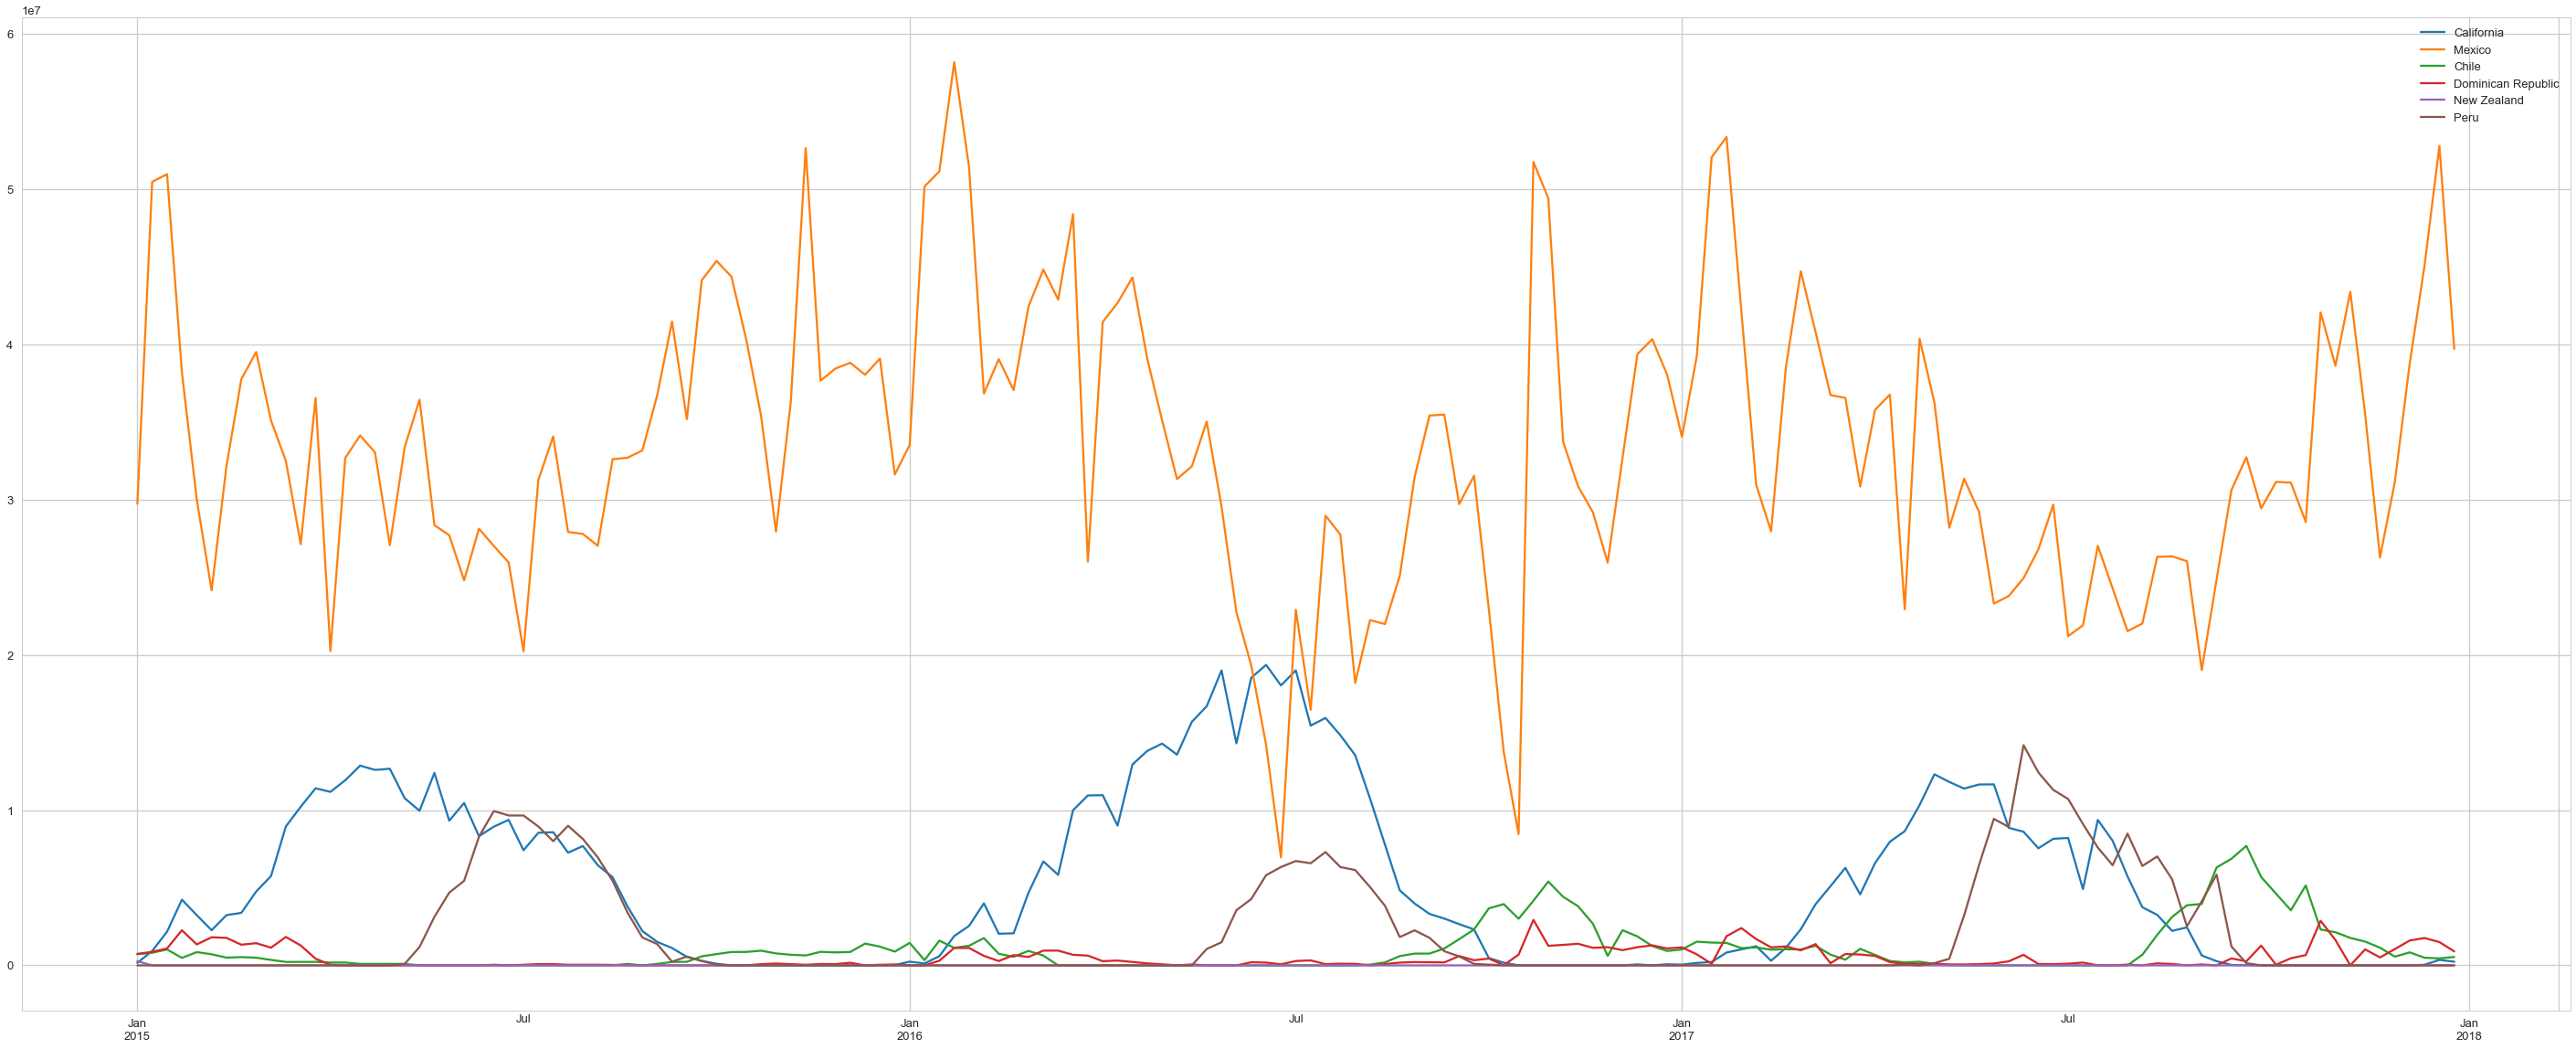

In [168]:
timeSeriesVolumeDF.plot.line(figsize=(50,20))

Text(0,0.5,'Pounds')

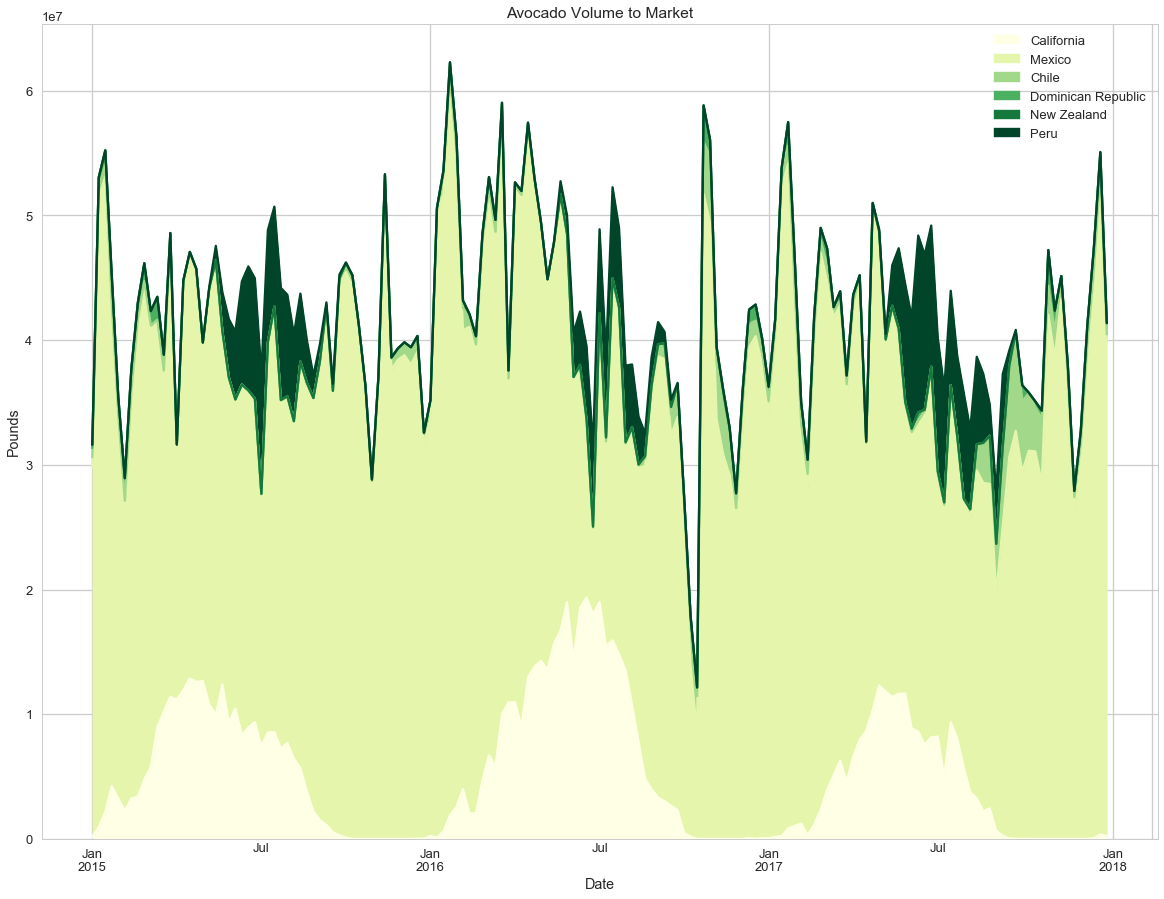

In [169]:
area = timeSeriesVolumeDF.plot.area(legend="topright", figsize=(20,15), colormap="YlGn", title="Avocado Volume to Market")
area.set_xlabel("Date")
area.set_ylabel("Pounds")

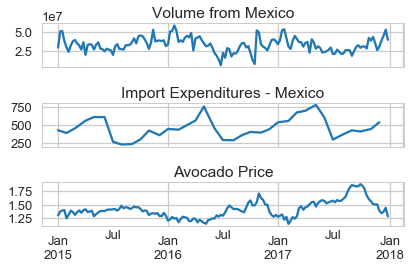

In [174]:
# Receive ax1 and ax2 - note that they go in parens
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False)

# Use ax1
timeSeriesVolumeDF.Mexico.plot(x='Year', y='Volume from Mexico', legend=False, ax=ax1)
ax1.set_title("Volume from Mexico")

# Use ax2
timeSeriesImports.Imports.plot(x='Year', y='Millions', legend=False, ax=ax2)
ax2.set_title("Import Expenditures - Mexico")

# Use ax3
timeSeriesDetailed.Prices.plot(x='Year', y='Avocado Price', legend=False, ax=ax3)
ax3.set_title("Avocado Price")

# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()
plt.savefig('3.png', dpi=200)

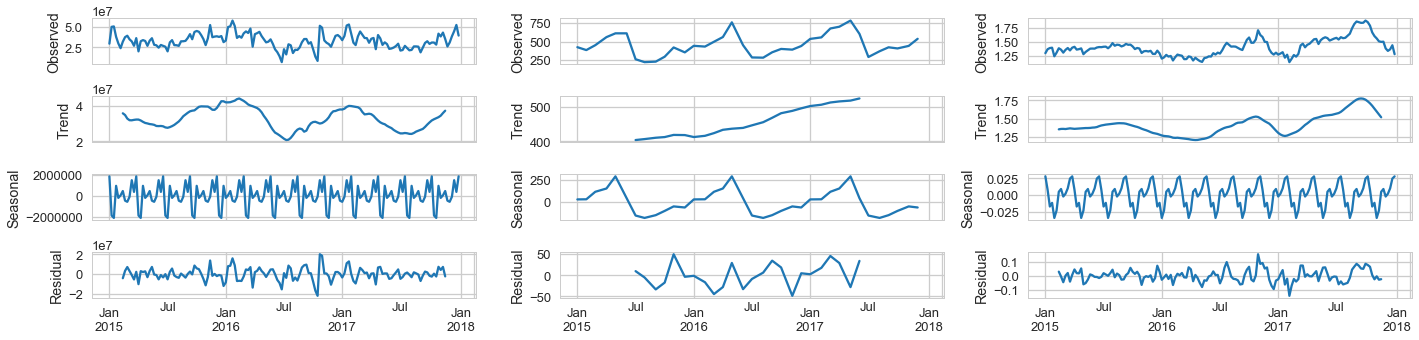

In [181]:
res1 = sm.tsa.seasonal_decompose(timeSeriesVolume.Mexico.interpolate(),
                                freq=decompfreq,
                                model='additive')
res2 = sm.tsa.seasonal_decompose(timeSeriesImports.Imports.interpolate(),
                                freq=decompfreq,
                                model='additive')
res3 = sm.tsa.seasonal_decompose(timeSeriesDetailed.Prices.interpolate(),
                                freq=decompfreq,
                                model='additive')

def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')


fig, axes = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(20,5))

plotseasonal(res1, axes[:,0])
plotseasonal(res2, axes[:,1])
plotseasonal(res3, axes[:,2])

plt.tight_layout()
plt.show()